In [1]:
import numpy as np
import pandas as pd
import scipy.io
import os
from scipy.signal import savgol_filter
from dtaidistance import dtw
import seaborn as sns
from sklearn import preprocessing
from numpy import inf
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from matplotlib import pyplot as plt
import scipy.spatial.distance as ssd

In [2]:
#load_path = 'D:\EECE499\Features\\'
load_path = '..\..\..\\'

In [3]:
Features = pd.read_excel(load_path + 'Features.xlsx')

In [4]:
Ratings = pd.read_excel(load_path + 'Ratings.xlsx')

In [5]:
presentations_ids = Features['presentation_id'].values
presentations_ids.shape

(603,)

In [6]:
indices_dict = []
series = []

for i, presentation_id in enumerate(presentations_ids):
    print(presentation_id, end='\r')
    
    indices_dict.append(presentation_id)
    
    clip_id = presentation_id % 100
    user_id = int(presentation_id / 100)
    
    #data_path = './../../ASCERTAIN_Raw/GSRData/Movie_P' + str(user_id).zfill(2) + '/GSR_Clip' + str(clip_id) + '.mat'
    data_path = 'D:/EECE499/Raw/MyECGFunc/ASCERTAIN_Raw/GSRData/Movie_P' + str(user_id).zfill(2) + '/GSR_Clip' + str(clip_id) + '.mat'
    
    if os.path.isfile(data_path):
        
        signal = scipy.io.loadmat(data_path)
        resistance = signal['Data_GSR'][:,4]
        
        resistance = savgol_filter(resistance, 501, 3)
        series.append(resistance)  

In [7]:
dist_matrix = np.load('dist_matrix.npy')

In [8]:
dist_matrix

array([[             inf,  685999.80847838,    6072.28759009, ...,
        3783948.6750768 , 4228522.04475941, 4413644.28624652],
       [             inf,              inf,  680700.33258028, ...,
        2984104.29115066, 3320866.42893749, 3443009.31890644],
       [             inf,              inf,              inf, ...,
        3278822.99052139, 4222344.78294347, 3741613.45647243],
       ...,
       [             inf,              inf,              inf, ...,
                     inf,  705816.71935999,  976350.51213576],
       [             inf,              inf,              inf, ...,
                     inf,              inf,  104844.25074745],
       [             inf,              inf,              inf, ...,
                     inf,              inf,              inf]])

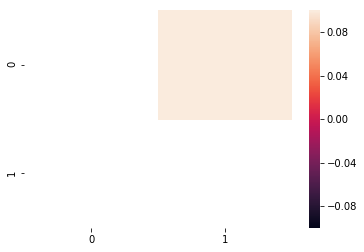

In [9]:
sns.heatmap(dist_matrix[:2,:2])

In [10]:
#dist_matrix[dist_matrix == inf] = 0.0

In [11]:
#sns.heatmap(dist_matrix)

In [12]:
#dist_matrix

In [13]:
dist_matrix.shape

(100, 100)

In [14]:
i_lower = np.tril_indices(dist_matrix.shape[0], -1)
dist_matrix[i_lower] = dist_matrix.T[i_lower]

In [15]:
np.fill_diagonal(dist_matrix, 0)

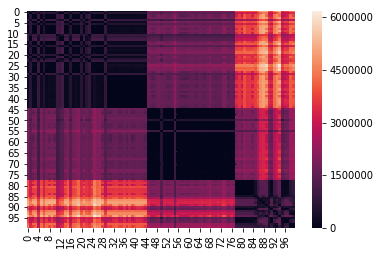

In [16]:
sns.heatmap(dist_matrix)

In [17]:
dist_matrix

array([[      0.        ,  685999.80847838,    6072.28759009, ...,
        3783948.6750768 , 4228522.04475941, 4413644.28624652],
       [ 685999.80847838,       0.        ,  680700.33258028, ...,
        2984104.29115066, 3320866.42893749, 3443009.31890644],
       [   6072.28759009,  680700.33258028,       0.        , ...,
        3278822.99052139, 4222344.78294347, 3741613.45647243],
       ...,
       [3783948.6750768 , 2984104.29115066, 3278822.99052139, ...,
              0.        ,  705816.71935999,  976350.51213576],
       [4228522.04475941, 3320866.42893749, 4222344.78294347, ...,
         705816.71935999,       0.        ,  104844.25074745],
       [4413644.28624652, 3443009.31890644, 3741613.45647243, ...,
         976350.51213576,  104844.25074745,       0.        ]])

In [18]:
dist_array = ssd.squareform(dist_matrix)

In [19]:
Z = linkage(dist_array, method='ward')

In [20]:
#dist_array[{n choose 2}-{n-i choose 2} + (j-i-1)] is the distance between points i and j
#dist_array[{4950}-{n-i choose 2} + (j-i-1)] is the distance between points i and j

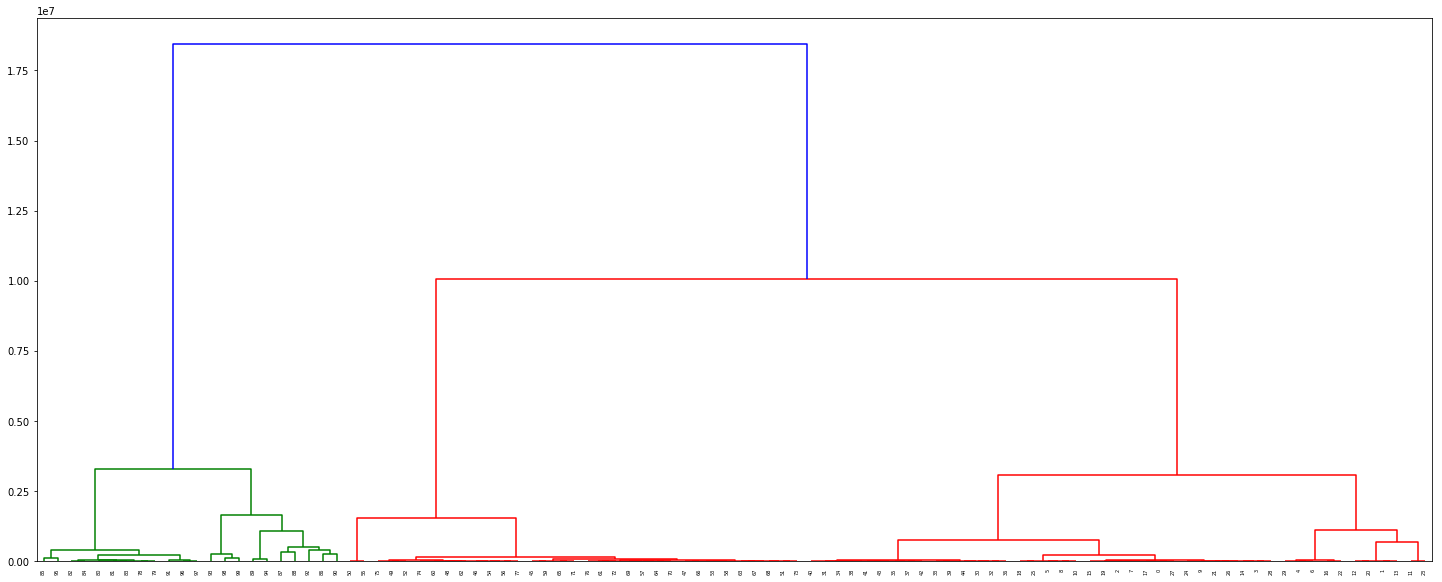

In [21]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.savefig('dendrogram_no_penalty.png', format='png', dpi=1000)
plt.show()

In [22]:
Z[1,0]

32.0

In [23]:
Z[1,1]

36.0

In [24]:
Z

array([[3.70000000e+01, 4.20000000e+01, 4.14802828e+02, 2.00000000e+00],
       [3.20000000e+01, 3.60000000e+01, 5.08117908e+02, 2.00000000e+00],
       [4.10000000e+01, 4.30000000e+01, 5.59728895e+02, 2.00000000e+00],
       [3.50000000e+01, 1.00000000e+02, 5.90577059e+02, 3.00000000e+00],
       [3.40000000e+01, 3.80000000e+01, 6.32345963e+02, 2.00000000e+00],
       [3.10000000e+01, 1.04000000e+02, 7.43659741e+02, 3.00000000e+00],
       [3.30000000e+01, 3.90000000e+01, 1.10451880e+03, 2.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 1.25717191e+03, 2.00000000e+00],
       [0.00000000e+00, 2.70000000e+01, 1.55866213e+03, 2.00000000e+00],
       [3.00000000e+01, 1.01000000e+02, 1.72883097e+03, 3.00000000e+00],
       [1.02000000e+02, 1.03000000e+02, 1.74805089e+03, 5.00000000e+00],
       [5.60000000e+01, 7.70000000e+01, 2.15601472e+03, 2.00000000e+00],
       [1.20000000e+01, 2.00000000e+01, 2.16364792e+03, 2.00000000e+00],
       [6.40000000e+01, 7.00000000e+01, 2.19150866e

In [25]:
dist_matrix_penalty = np.load('dist_matrix_penalty.npy')

In [26]:
i_lower = np.tril_indices(dist_matrix_penalty.shape[0], -1)
dist_matrix_penalty[i_lower] = dist_matrix_penalty.T[i_lower]

In [27]:
np.fill_diagonal(dist_matrix_penalty, 0)

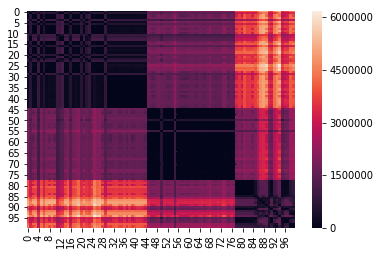

In [28]:
sns.heatmap(dist_matrix_penalty)

In [29]:
dist_array_penalty = ssd.squareform(dist_matrix_penalty)

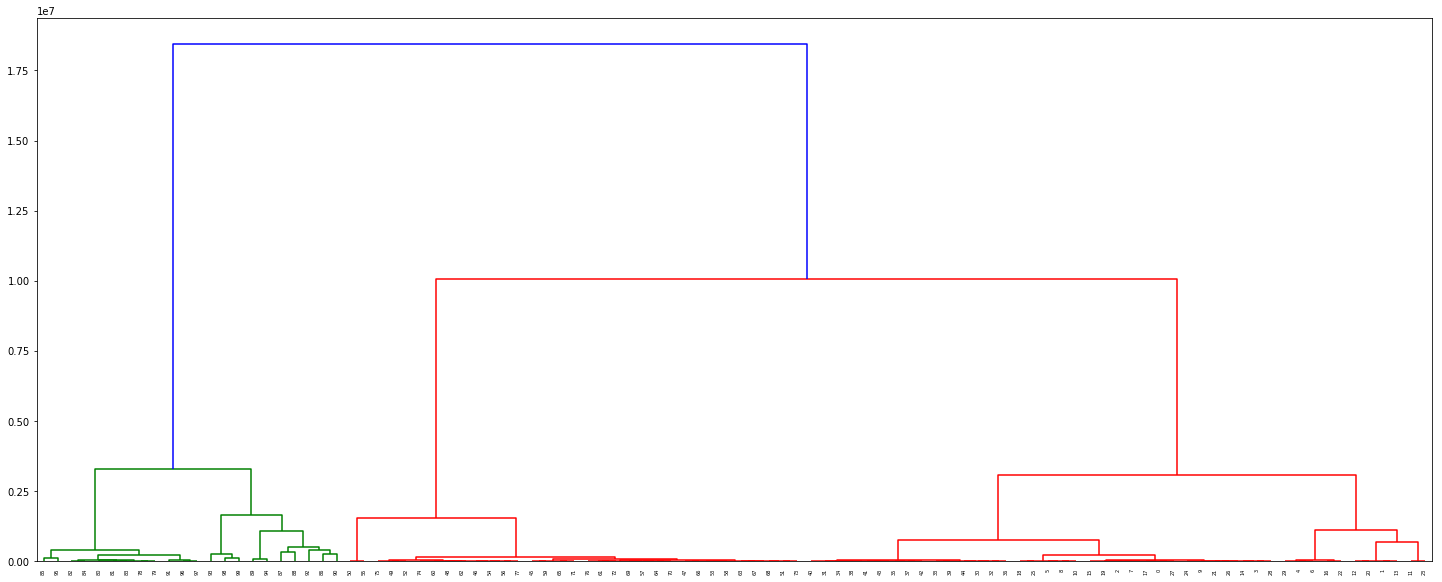

In [30]:
Z_2 = linkage(dist_array_penalty, method='ward')

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z_2)
plt.savefig('dendrogram_penalty.png', format='png', dpi=1000)
plt.show()

In [31]:
Z

array([[3.70000000e+01, 4.20000000e+01, 4.14802828e+02, 2.00000000e+00],
       [3.20000000e+01, 3.60000000e+01, 5.08117908e+02, 2.00000000e+00],
       [4.10000000e+01, 4.30000000e+01, 5.59728895e+02, 2.00000000e+00],
       [3.50000000e+01, 1.00000000e+02, 5.90577059e+02, 3.00000000e+00],
       [3.40000000e+01, 3.80000000e+01, 6.32345963e+02, 2.00000000e+00],
       [3.10000000e+01, 1.04000000e+02, 7.43659741e+02, 3.00000000e+00],
       [3.30000000e+01, 3.90000000e+01, 1.10451880e+03, 2.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 1.25717191e+03, 2.00000000e+00],
       [0.00000000e+00, 2.70000000e+01, 1.55866213e+03, 2.00000000e+00],
       [3.00000000e+01, 1.01000000e+02, 1.72883097e+03, 3.00000000e+00],
       [1.02000000e+02, 1.03000000e+02, 1.74805089e+03, 5.00000000e+00],
       [5.60000000e+01, 7.70000000e+01, 2.15601472e+03, 2.00000000e+00],
       [1.20000000e+01, 2.00000000e+01, 2.16364792e+03, 2.00000000e+00],
       [6.40000000e+01, 7.00000000e+01, 2.19150866e

In [32]:
Z_2

array([[3.70000000e+01, 4.20000000e+01, 4.29467248e+02, 2.00000000e+00],
       [3.20000000e+01, 3.60000000e+01, 5.26611553e+02, 2.00000000e+00],
       [4.10000000e+01, 4.30000000e+01, 5.72229312e+02, 2.00000000e+00],
       [3.50000000e+01, 1.00000000e+02, 6.04569001e+02, 3.00000000e+00],
       [3.40000000e+01, 3.80000000e+01, 6.43870010e+02, 2.00000000e+00],
       [3.10000000e+01, 1.04000000e+02, 7.51886427e+02, 3.00000000e+00],
       [3.30000000e+01, 3.90000000e+01, 1.10953173e+03, 2.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 1.25990347e+03, 2.00000000e+00],
       [0.00000000e+00, 2.70000000e+01, 1.56183117e+03, 2.00000000e+00],
       [3.00000000e+01, 1.01000000e+02, 1.73096526e+03, 3.00000000e+00],
       [1.02000000e+02, 1.03000000e+02, 1.75181221e+03, 5.00000000e+00],
       [5.60000000e+01, 7.70000000e+01, 2.15821839e+03, 2.00000000e+00],
       [1.20000000e+01, 2.00000000e+01, 2.16558762e+03, 2.00000000e+00],
       [6.40000000e+01, 7.00000000e+01, 2.19392103e

In [33]:
Z - Z_2

array([[ 0.00000000e+00,  0.00000000e+00, -1.46644200e+01,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.84936452e+01,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.25004165e+01,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.39919429e+01,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.15240470e+01,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -8.22668539e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -5.01292235e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.73156117e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -3.16903795e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.13429469e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -3.76131591e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.20367487e+00,
      

In [34]:
tree = cut_tree(Z, n_clusters=7)

In [35]:
tree.shape

(100, 1)

In [43]:
cutree = tree.T[0]

In [44]:
cutree

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5,
       5, 5, 5, 4, 5, 6, 5, 4, 4, 4, 6, 6])

In [45]:
indices_dict

[1001,
 1002,
 1003,
 1004,
 1006,
 1007,
 1008,
 1010,
 1011,
 1012,
 1013,
 1015,
 1016,
 1017,
 1018,
 1019,
 1020,
 1022,
 1024,
 1025,
 1026,
 1027,
 1028,
 1029,
 1030,
 1031,
 1032,
 1033,
 1034,
 1036,
 1102,
 1103,
 1104,
 1107,
 1108,
 1109,
 1110,
 1111,
 1112,
 1115,
 1118,
 1122,
 1128,
 1130,
 1136,
 1201,
 1202,
 1203,
 1204,
 1205,
 1206,
 1207,
 1208,
 1209,
 1210,
 1211,
 1212,
 1213,
 1214,
 1215,
 1216,
 1217,
 1218,
 1220,
 1221,
 1222,
 1223,
 1224,
 1225,
 1226,
 1227,
 1229,
 1230,
 1231,
 1232,
 1234,
 1235,
 1236,
 1309,
 1310,
 1316,
 1319,
 1328,
 1335,
 1336,
 1401,
 1402,
 1404,
 1405,
 1406,
 1408,
 1409,
 1410,
 1412,
 1414,
 1415,
 1416,
 1418,
 1419,
 1420,
 1421,
 1422,
 1423,
 1425,
 1427,
 1428,
 1429,
 1430,
 1431,
 1433,
 1434,
 1436,
 1503,
 1802,
 1803,
 1808,
 1812,
 1827,
 1830,
 1833,
 1901,
 1902,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,

In [59]:
clusters = [[] for i in range(7)]

In [60]:
clusters

[[], [], [], [], [], [], []]

In [61]:
for i, c in enumerate(cutree):
    #print(i, c)
    clusters[c].append(indices_dict[i])

In [63]:
for i in range(6):
    print(len(clusters[i]) == sum(cutree == i))

True
True
True
True
True
True


In [78]:
x = Ratings.iloc[(Ratings.presentation_id == 101).values]

In [101]:
x

,arousal,engaging,familiarity,liking,presentation_id,valence
0,1,4.0,2.0,5.0,101,1


In [105]:
Ratings[:100]

,arousal,engaging,familiarity,liking,presentation_id,valence
0,1,4.0,2.0,5.0,101,1
1,3,5.0,0.0,4.0,102,2
2,1,3.0,0.0,3.0,103,-2
3,6,5.0,0.0,3.0,104,0
4,4,4.0,1.0,4.0,105,1
5,4,4.0,0.0,3.0,106,0
6,3,5.0,3.0,4.0,107,1
7,4,5.0,0.0,5.0,108,2
8,4,5.0,0.0,5.0,109,2
9,4,5.0,4.0,6.0,110,3


In [111]:
arousal_clusters = [[] for i in range(7)]
engaging_clusters = [[] for i in range(7)]
familiarity_clusters = [[] for i in range(7)]
liking_clusters = [[] for i in range(7)]
valence_clusters = [[] for i in range(7)]

In [106]:
def get_values(dimension, cluster):
    v = []
    for c in cluster:
        #print(Ratings.iloc[(Ratings.presentation_id == c).values][dimension].values[0])
        v.append(Ratings.iloc[(Ratings.presentation_id == c).values][dimension].values[0])
    return v

In [112]:
for i in range(7):
    arousal_clusters[i] = get_values('arousal', clusters[i])
    engaging_clusters[i] = get_values('engaging', clusters[i])
    familiarity_clusters[i] = get_values('familiarity', clusters[i])
    liking_clusters[i] = get_values('liking', clusters[i])
    valence_clusters[i] = get_values('valence', clusters[i])

In [113]:
arousal_clusters

[[4,
  3,
  4,
  3,
  4,
  2,
  6,
  3,
  1,
  4,
  3,
  5,
  5,
  4,
  3,
  3,
  5,
  4,
  3,
  3,
  3,
  5,
  2,
  5,
  5,
  2,
  4,
  4,
  2,
  4,
  3,
  4,
  6,
  4],
 [4, 2, 3, 3, 4, 4, 3, 3, 3, 4, 4],
 [3,
  3,
  3,
  3,
  4,
  3,
  5,
  4,
  4,
  5,
  3,
  3,
  4,
  3,
  3,
  4,
  4,
  3,
  4,
  3,
  4,
  4,
  4,
  4,
  3,
  4,
  4,
  4,
  4,
  4,
  4],
 [3, 4],
 [4, 3, 4, 3, 5, 6, 6, 4, 5, 4, 3, 4],
 [6, 6, 6, 4, 4, 5, 5],
 [2, 4, 4]]

In [114]:
engaging_clusters

[[5.0,
  4.0,
  5.0,
  4.0,
  5.0,
  5.0,
  6.0,
  3.0,
  6.0,
  4.0,
  6.0,
  6.0,
  4.0,
  5.0,
  5.0,
  4.0,
  5.0,
  4.0,
  4.0,
  4.0,
  3.0,
  5.0,
  5.0,
  5.0,
  5.0,
  4.0,
  6.0,
  5.0,
  4.0,
  4.0,
  6.0,
  5.0,
  6.0,
  5.0],
 [5.0, 6.0, 5.0, 4.0, 6.0, 5.0, 6.0, 5.0, 5.0, 5.0, 4.0],
 [4.0,
  4.0,
  5.0,
  4.0,
  5.0,
  4.0,
  6.0,
  5.0,
  5.0,
  5.0,
  4.0,
  4.0,
  5.0,
  4.0,
  4.0,
  4.0,
  3.0,
  4.0,
  4.0,
  3.0,
  5.0,
  4.0,
  5.0,
  4.0,
  3.0,
  3.0,
  3.0,
  4.0,
  4.0,
  4.0,
  4.0],
 [4.0, 4.0],
 [4.0, 4.0, 5.0, 3.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0],
 [6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 6.0],
 [6.0, 5.0, 6.0]]

In [115]:
liking_clusters

[[4.0,
  4.0,
  3.0,
  3.0,
  5.0,
  5.0,
  6.0,
  5.0,
  6.0,
  3.0,
  2.0,
  6.0,
  1.0,
  2.0,
  3.0,
  2.0,
  3.0,
  2.0,
  0.0,
  4.0,
  3.0,
  5.0,
  2.0,
  5.0,
  5.0,
  3.0,
  5.0,
  5.0,
  2.0,
  4.0,
  5.0,
  1.0,
  4.0,
  2.0],
 [5.0, 5.0, 5.0, 4.0, 6.0, 5.0, 2.0, 3.0, 2.0, 3.0, 2.0],
 [5.0,
  4.0,
  5.0,
  4.0,
  5.0,
  2.0,
  6.0,
  5.0,
  5.0,
  5.0,
  4.0,
  4.0,
  6.0,
  5.0,
  2.0,
  4.0,
  3.0,
  3.0,
  5.0,
  2.0,
  6.0,
  3.0,
  5.0,
  2.0,
  2.0,
  3.0,
  2.0,
  2.0,
  0.0,
  2.0,
  2.0],
 [4.0, 4.0],
 [5.0, 2.0, 5.0, 4.0, 1.0, 5.0, 1.0, 4.0, 5.0, 5.0, 5.0, 6.0],
 [6.0, 6.0, 4.0, 5.0, 6.0, 6.0, 6.0],
 [6.0, 5.0, 4.0]]

In [116]:
familiarity_clusters

[[4.0,
  4.0,
  1.0,
  3.0,
  1.0,
  3.0,
  4.0,
  0.0,
  4.0,
  2.0,
  4.0,
  4.0,
  4.0,
  4.0,
  0.0,
  3.0,
  3.0,
  4.0,
  0.0,
  3.0,
  4.0,
  3.0,
  3.0,
  3.0,
  4.0,
  4.0,
  3.0,
  3.0,
  3.0,
  2.0,
  4.0,
  3.0,
  4.0,
  2.0],
 [0.0, 0.0, 4.0, 4.0, 3.0, 0.0, 4.0, 2.0, 4.0, 1.0, 4.0],
 [3.0,
  0.0,
  2.0,
  2.0,
  2.0,
  0.0,
  4.0,
  2.0,
  0.0,
  2.0,
  0.0,
  0.0,
  4.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  3.0,
  0.0,
  4.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0, 0.0],
 [4.0, 1.0, 0.0, 0.0, 0.0, 2.0, 1.0, 3.0, 3.0, 4.0, 3.0, 1.0],
 [0.0, 2.0, 4.0, 0.0, 3.0, 1.0, 0.0],
 [4.0, 0.0, 0.0]]

In [117]:
import seaborn as sns

C:\Users\Danny\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


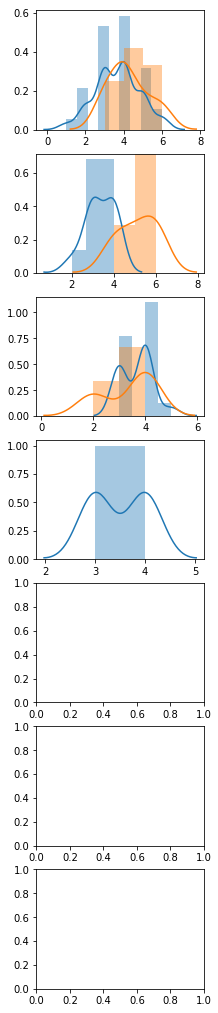

In [136]:
fig, axs = plt.subplots(nrows=7)
for i in range(7):
    sns.distplot(arousal_clusters[i], ax=axs[i % 4])
    #plt.xlim(0, 6)
fig.set_size_inches(3,18)

C:\Users\Danny\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Danny\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Danny\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Danny\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Danny\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


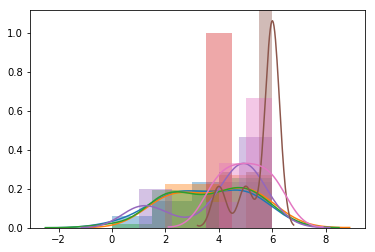

In [140]:
for i in range(7):
    sns.distplot(liking_clusters[i])

In [127]:
familiarity_clusters[6]

[4.0, 0.0, 0.0]

C:\Users\Danny\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Danny\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Danny\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Danny\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Danny\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


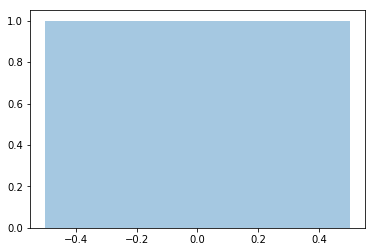

In [126]:
sns.distplot(familiarity_clusters[3])